# Time-integrated point source search analysis example

In [2]:
#import os
#os.getcwd()

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

x_data = np.array([
    1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
    12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
    23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
    34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
    45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
    56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
    67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
    78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
    89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
    100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
    111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
    122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
    133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
    144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
    155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
    166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
    177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
    188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
    199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
    210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
    221., 222., 223., 224., 225., 226., 227., 228., 229., 230., 231.,
    232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
    243., 244., 245., 246., 247., 248., 249., 250., 251., 252., 253.,
    254., 255., 256., 257., 258., 259., 260., 261., 262., 263., 264.,
    265., 266., 267., 268., 269., 270., 271., 272., 273., 274., 275.,
    276., 277., 278., 279., 280., 281., 282., 283., 284., 285., 286.,
    287., 288., 289., 290., 291., 292., 293., 294., 295., 296., 297.,
    298., 299., 300.
])
y_data = np.array([
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0,
    0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.003, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0.001, 0.0,
    0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001,
    0.001, 0.001, 0.0, 0.001, 0.0, 0.001, 0.004, 0.001, 0.0, 0.001,
    0.001, 0.002, 0.002, 0.001, 0.001, 0.0, 0.001, 0.003, 0.003, 0.0,
    0.0, 0.001, 0.003, 0.003, 0.001, 0.003, 0.005, 0.005, 0.002, 0.002,
    0.003, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.001, 0.003,
    0.001, 0.004, 0.005, 0.002, 0.005, 0.002, 0.011, 0.004, 0.011,
    0.003, 0.009, 0.008, 0.008, 0.004, 0.007, 0.009, 0.007, 0.007,
    0.008, 0.008, 0.009, 0.014, 0.004, 0.006, 0.01, 0.01, 0.011, 0.008,
    0.017, 0.015, 0.01, 0.011, 0.016, 0.016, 0.014, 0.014, 0.004,
    0.019, 0.009, 0.016, 0.012, 0.011, 0.018, 0.015, 0.026, 0.018,
    0.019, 0.024, 0.023, 0.018, 0.025, 0.031, 0.022, 0.037, 0.029,
    0.024, 0.032, 0.037, 0.027, 0.036, 0.03, 0.035, 0.03, 0.029, 0.052,
    0.042, 0.039, 0.042, 0.053, 0.054, 0.048, 0.051, 0.032, 0.045,
    0.05, 0.036, 0.042, 0.057, 0.047, 0.056, 0.058, 0.073, 0.05, 0.059,
    0.055, 0.073, 0.056, 0.075, 0.074, 0.089, 0.076, 0.071, 0.066,
    0.064, 0.084, 0.077, 0.085, 0.087, 0.092, 0.092, 0.088, 0.101,
    0.09, 0.101, 0.125, 0.094, 0.09, 0.109, 0.12, 0.107, 0.101, 0.12,
    0.114, 0.107
])

# --- Step 1: Smooth the data ---
# The window_length must be an odd integer. A larger value creates a smoother curve.
# The polyorder must be less than the window_length. It's the order of the polynomial
# used to fit the samples.
window_length = 51
polyorder = 3
# By setting mode='nearest', we ensure the output array has the same length as the input,
# which avoids dimension mismatch errors that can occur in different versions of the SciPy library.
y_smoothed = savgol_filter(y_data, window_length, polyorder, mode='nearest')

In [125]:
x_data=x_data[:-2]

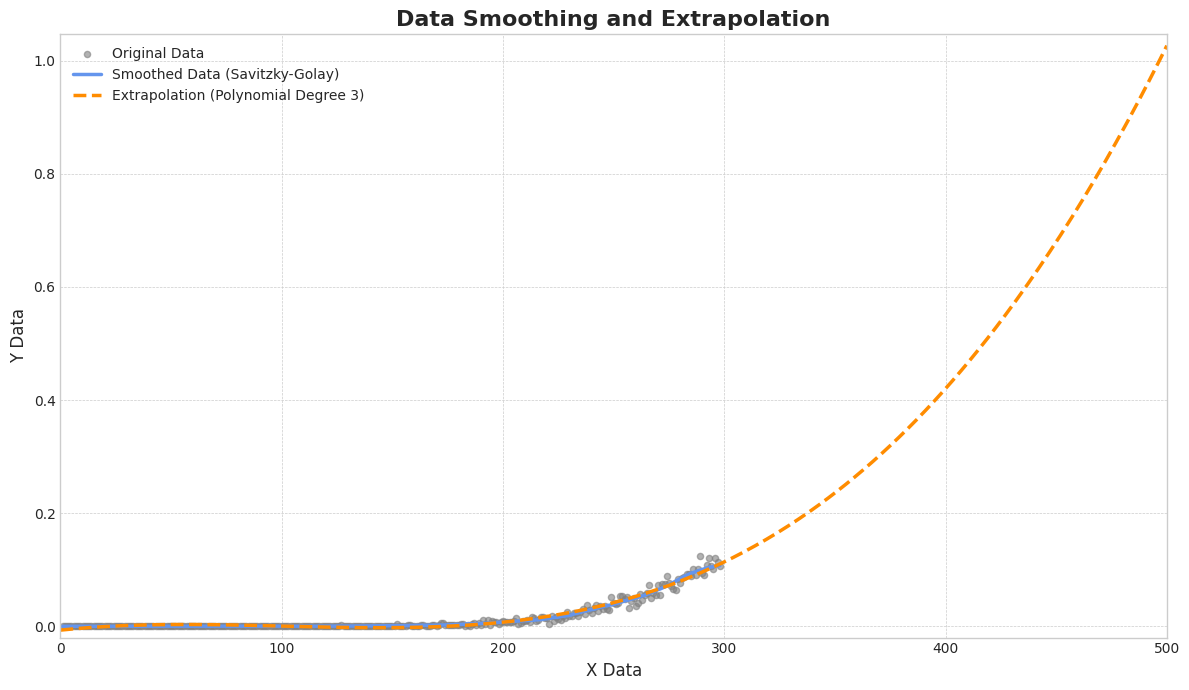

In [130]:
# --- Step 2: Extrapolate the data ---
# We will fit a polynomial to the *smoothed* data to capture the trend.
# A degree of 2 (quadratic) is often a good starting point.
degree = 3
coeffs = np.polyfit(x_data, y_smoothed, degree)
poly_func = np.poly1d(coeffs)

# Define the range for extrapolation
# Let's extrapolate out to x = 400
x_extrapolate = np.arange(0, 501)
y_extrapolate = poly_func(x_extrapolate)

# --- Step 3: Plot the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot original data
ax.scatter(x_data, y_data, label='Original Data', color='gray', alpha=0.6, s=20)

# Plot smoothed data
ax.plot(x_data, y_smoothed, label=f'Smoothed Data (Savitzky-Golay)', color='cornflowerblue', linewidth=2.5)

# Plot extrapolated data
ax.plot(x_extrapolate, y_extrapolate, label=f'Extrapolation (Polynomial Degree {degree})', color='darkorange', linestyle='--', linewidth=2.5)

# Formatting the plot
ax.set_title('Data Smoothing and Extrapolation', fontsize=16, fontweight='bold')
ax.set_xlabel('X Data', fontsize=12)
ax.set_ylabel('Y Data', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set plot limits for better visualization
ax.set_xlim(left=0, right=500)
ax.set_ylim(bottom=min(y_data) - 0.02, top=max(y_extrapolate) + 0.02)

plt.tight_layout()
plt.show()

In [135]:
(poly_func-0.5).roots[0]

(417.12312434157275+0j)

## Software setup

In [15]:
import sys
import glob
import os

# Add skyllh and i3skyllh projects to the PYTHONPATH
sys.path.insert(0, '/data/user/liruohan/software/skyllh')
sys.path.insert(0, '/data/user/liruohan/software/i3skyllh')
#sys.path.insert(0, '/home/liruohan/.local/lib/python3.7/site-packages')
#sys.path.insert(0, '/home/cbellenghi/.pyenv/versions/3.8.1/lib/python3.8/site-packages')

# Add missing python packages from cvmfs
#sys.path.insert(0, '/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages')
extra_path = "/cvmfs/icecube.opensciencegrid.org/users/tkontrimas/software/pip/python3.11/site-packages" # whatever individual directory it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

## Create `datasets` object

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from skyllh.core.config import Config
from skyllh.core.random import RandomStateService
from skyllh.core.timing import TimeLord
from skyllh.core.source_model import PointLikeSource

# Pre-defined datasets
from i3skyllh.datasets import data_samples

#Pre-defined analysis
from i3skyllh.analyses.trad_single_ps import analysis as trad_single_analysis #powerlaw catalog
from i3skyllh.analyses.trad_stacked_ps import analysis as trad_stacking_analysis #powerlaw stacking
from i3skyllh.analyses.trad_single_ps import analysis_dm as trad_single_analysis_dm #dm catalog
from i3skyllh.analyses.trad_stacked_ps import analysis_dm as trad_stacking_analysis_dm #dm stacking

# import matplotlib as mpl

# mpl.rcParams['figure.figsize'] = (6,4)
# mpl.rcParams['figure.dpi'] = 300

In [5]:
# Update global settings to use 2 cpu cores
#Config['multiproc']['ncpu'] = 2
cfg=Config()
cfg.set_ncpu(2)

from skyllh.core.datafields import (
    DataFieldStages as DFS,
)
# use no MC
# cfg['datafields']['astro'] = DFS.ANALYSIS_MC
# cfg['datafields']['conv'] = DFS.ANALYSIS_MC

In [6]:
# Specify base path for datasets
data_base_path = '/data/ana/analyses'

# Load specific dataset collection
dsc = data_samples['NorthernTracks_v005p01'].create_dataset_collection(
            base_path=data_base_path,cfg=cfg) #or NorthernTracks_v005p01 or OscNext_v002p04

# Pick a dataset or create a list of datasets from the dataset collection
datasets = dsc.get_datasets('IC86_2011_2021')

In [7]:
from skyllh.core.minimizers.iminuit import IMinuitMinimizerImpl

In [8]:
# Define some common analysis parameters
#refplflux_gamma = 0.5
minimizer_impl = IMinuitMinimizerImpl(cfg=cfg)
#minimizer_impl = None
#optimize_delta_angle = 10.0
rss_seed = 1
rss = RandomStateService(rss_seed)

In [9]:
from skyllh.core.utils.analysis import calculate_critical_ts_from_gamma

In [17]:
bkg_dir='/data/user/liruohan/dm_model_stacking/trials/1TeV/bkg/'
bkg_trials = np.concatenate([np.load(f) for f in glob.glob(os.path.join(bkg_dir, '*.npy'))])

In [33]:
from scipy.stats import norm
# sensitivity
# bkg_p = 0.5
# sig_p = 0.9
# 3 sigma dp
bkg_p = norm.sf(3,0,1)
sig_p = 0.5
# 5 sigma dp
bkg_p = norm.sf(5,0,1)
sig_p = 0.5

In [34]:
bkg_p

2.866515718791933e-07

In [69]:
ts_critical = calculate_critical_ts_from_gamma(bkg_trials['ts'], norm.sf(5,0,1))

In [70]:
# if gamma == 2.0:
#     n_max = 50
# if gamma == 3.2:
#     n_max = 150
# if args['flux_model'] == 'seyfert':
#     n_max = 150
n_max=300
number_of_signals = np.linspace(1, n_max, n_max)
sig_dir='/data/user/liruohan/dm_model_stacking/trials/1TeV/sig/'

In [71]:
percentage_above_bkg = []
percentage_above_critical_ts = []
mean_ns_inj = []
for ns in number_of_signals:
    
    fpath = sig_dir + '/mean_ns{}_trials20_rss*.npy'.format(str(ns))
    print(fpath)
    sig_trials = np.concatenate([np.load(f) for f in glob.glob(fpath)])
    
    mean_ns_inj.append(ns)
    # Calculate ns for percentile above background median
    percentage_above_bkg.append((
        np.sum(sig_trials['ts'] > np.median(bkg_trials['ts']))
    )/sig_trials.size)

    # Calculate ns for percentile above background median
    percentage_above_critical_ts.append((
        np.sum(sig_trials['ts'] > ts_critical)
    )/sig_trials.size)

/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns1.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns2.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns3.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns4.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns5.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns6.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns7.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns8.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns9.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns10.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns11.0_trials20_rss*.npy
/data/user/liruohan/dm_model_stacking/trials/1TeV/sig//mean_ns12.0_trials2

In [72]:
n_max = max(mean_ns_inj)

In [73]:
# define a function as the spline minus
# the fraction of signal trials above critical TS
def func(mu, spline, perc):
    y = spline.evaluate_simple([mu])
    y = y - perc
    return y

In [74]:
from photospline import (
    SplineTable,
    glam_fit,
    ndsparse,
)

In [58]:
def construct_photospline(n_max, x, y, order=3, smoothing=1, penalty=2):
    """Constructs a penalized B-spline using the photospline package.

    Parameters
    ----------
    n_max: int
        value to construct the range for the spline knots.
    x: sequence of float
        List or array of x values for the spline construction.
    y: sequence of float
        List or array of y values for the spline construction.
    order: int
        Order of the penalized B-spline.
    smoothing: float
        Regularization factor for the penalized B-spline.
    penalty: int
        Penalty factor for the penalized B-spline.

    Returns
    -------
    spline: instance of photospline.SplineTable
    """
    
    knots = np.arange(-0.1,n_max+1, 0.3)
    spline = glam_fit(
        *ndsparse.from_data(
            np.array(y),
            np.ones(np.array(y).shape)),
        [np.array(x)],
        [knots],
        [order] * np.array(x).ndim,
        [smoothing],
        [penalty],
    )

    return spline

In [59]:
from scipy.optimize import root_scalar

In [64]:
# Create interpolation spline for sensitivity and disc potential
spline_sens = construct_photospline(
    n_max, mean_ns_inj, percentage_above_bkg)
spline_dp = construct_photospline(
    n_max, mean_ns_inj, percentage_above_critical_ts)

# use scipy to find root
ns_sens = root_scalar(func, args=(spline_sens, 0.9), bracket=[0.1, n_max]).root
print(f'\nMean number of signal events for sensitivity: {ns_sens}')

ns_dp = root_scalar(func, args=(spline_dp, 0.5), bracket=[0.1, n_max]).root
print(f'Mean number of signal events for 5sigma discovery potential: {ns_dp}')


Mean number of signal events for sensitivity: 102.53905294313944
Mean number of signal events for 5sigma discovery potential: 226.3009342079483


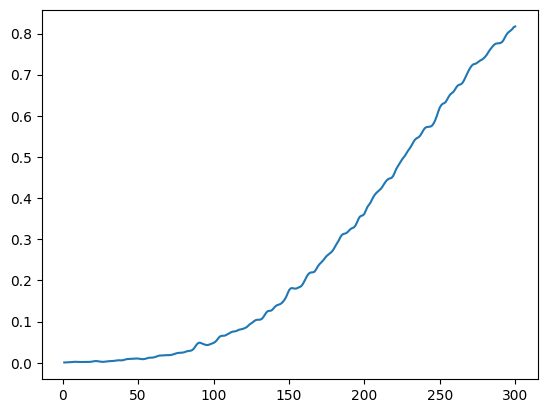

In [65]:
plt.plot(number_of_signals,spline_dp.grideval([number_of_signals]))

In [66]:
def plot_ax(ax, n_max, x, y, spline, perc, ns_crit):
    """Plots the (x,y) data on a scatter plot and
    the corresponding spline interpolation on the given
    axis `ax`.
    It also indicated the critical percentile value
    and the correspoding mean number of signal events.

    Parameters
    ----------
    ax: instance of matplotlib.axes.Axes
        The figure axis where to plot.
    n_max: int
        Maximum value for the spline x range.
    x: sequence of float
        List or array of x values for the scatter plot.
    y: sequence of float
        List or array of y values for the scatter plot.
    spline: instance of photospline.SplineTable
        The penalized B-spline interpolating y(x).
    perc: float
        The critical percentile
    ns_crit: float
        The mean number of signal events to get the critical percentile.
    """

    spline_xrange = np.linspace(0.1,n_max,100)

    if perc == 0.9:
        data_label = "above bkg median"
    else:
        data_label = "above critical TS"

    ax.scatter(x, y, s=15, c='k', label="% TS "+data_label)
    ax.plot(
        spline_xrange, spline.grideval([spline_xrange]),
        lw=2, ls='--', label="Photospline")
    ax.axhline(perc)
    ax.axvline(ns_crit, ls='--', c='r')

    ax.set_ylabel("p > "+data_label+" [%]", size=12)
    ax.set_xlabel('<$\mu_{inj}$>', size=12)

    ax.legend(frameon=False, prop={'size':10})

    return

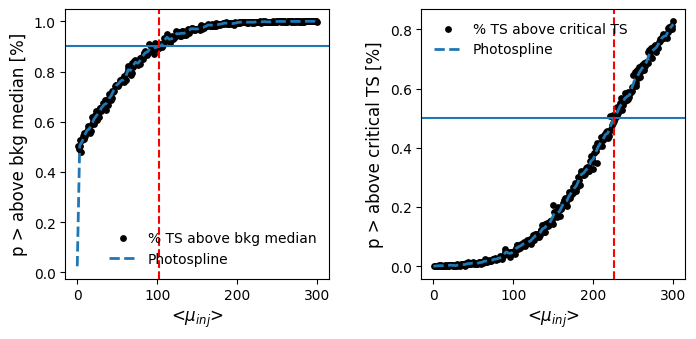

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,3.5))
plot_ax(
    ax1, n_max, mean_ns_inj, percentage_above_bkg, 
    spline_sens, 0.9, ns_sens)
plot_ax(
    ax2, n_max, mean_ns_inj, percentage_above_critical_ts, 
    spline_dp, 0.5, ns_dp)

plt.subplots_adjust(wspace=.35)

In [8]:
#if you want to test single source, use this cell
#single_src= most_significant_src['NGC4258']
source = PointLikeSource(ra=np.deg2rad(40.75),dec=np.deg2rad(-0.05))

In [9]:
# if you want to test stacking source list, use this cell
ra_arr=np.array([224.755625  , 154.802375  ,   2.02341667, 278.76416667,
        280.5375    , 351.8415    , 299.9994    , 205.2964    ,
        120.68079167, 232.82541667, 104.90875   , 141.321     ,
        234.15958333, 218.71854167, 210.07675   , 141.162     ,
        169.74041667, 141.30375   , 352.6552    , 198.8155    ,
        126.292625  , 118.85541667, 286.35791667,  90.54042   ,
        174.80791667, 174.80791667, 184.47916667, 233.96791667,
        239.79      , 208.26416667, 184.02954167, 219.09208333,
         68.29625   , 195.9975    , 166.1138    ,  73.01958   ,
         34.11292   ,   1.58125   , 139.60833333, 226.005     ,
        171.40083333, 144.55108333, 253.4676    , 196.587375  ,
        323.9766    , 121.41108333, 197.2733    , 259.81041667,
        194.9531    ,  88.72333333,  77.68958333,  70.94537   ,
        115.63666667, 321.164     , 224.27833333, 345.815     ,
         49.95067   ,  37.06079   ,  38.575     , 214.49791667,
        184.61041667, 103.05083333,  12.19642   ,  42.67417   ,
        321.9373    , 304.6606    ,  93.90129   , 307.1462    ,
          6.38092   , 176.31666667, 166.69791667, 186.4455    ,
        183.2627    , 155.8775    , 205.53458333, 180.79      ,
        182.63583333, 182.3745    , 198.365     , 186.45333333,
        184.7397    ])
dec_arr=np.array([61.23152778, 63.96741667, 14.83983333, 32.69638889, 79.77138889,
        15.41036111, 65.14851   , 30.37811   , 31.06758333,  7.45777778,
        54.19666667, 69.488     , 54.55916667, 48.66186111,  5.04505556,
        56.12969444, 58.05666667, 52.28638889, 71.37911   , 44.4075    ,
        37.98880556, 39.18611111, 42.46111111, 28.47139   , 33.93083333,
        33.93083333, 58.65972222, 57.9025    , 35.02972222, 69.30833333,
        50.825     , 58.79416667,  5.35444444, 53.79172   , 38.20883   ,
        49.54583   , 51.42375   , 20.20277778, 16.30527778, 10.43782   ,
        54.3825    ,  7.72777778, 39.76017   , 53.30641667, 47.47453   ,
        26.16816667, 11.63414   , 48.98027778, 27.9807    , 46.43944444,
        16.49888889, 28.97194   , 49.80972222, 50.97329   , 49.669     ,
         8.87388889, 41.5117    , 31.31094   , 32.48333   , 25.13666667,
        29.81277778, 74.42694444, 31.95697   , 54.70419   , 56.94436   ,
        40.68344   , 71.03748   , 25.73361   , 68.36147   , 79.68138889,
        72.56861111, 12.66203   ,  7.03881   , 19.865     , 35.65416667,
        44.53138889, 39.40583333, 43.685     , 36.59358   , 33.54694444,
        47.30397   ])
weight_arr=np.array([0.00040521, 0.00040846, 0.00040989, 0.00041909, 0.00044537,
       0.00045612, 0.00046153, 0.00046779, 0.00047393, 0.00048039,
       0.00048195, 0.00048958, 0.00049103, 0.00049265, 0.00049313,
       0.00051222, 0.00052136, 0.00052444, 0.0005435 , 0.00055509,
       0.0006125 , 0.00065439, 0.00065587, 0.00068172, 0.00069196,
       0.00069196, 0.00069241, 0.00073913, 0.00075588, 0.00076813,
       0.0007818 , 0.00079068, 0.00079232, 0.00081294, 0.00082382,
       0.0008812 , 0.00089339, 0.00092314, 0.00094126, 0.0009752 ,
       0.00097793, 0.00098586, 0.00114846, 0.00116211, 0.00116522,
       0.00117926, 0.00118397, 0.00126644, 0.00138562, 0.00154348,
       0.00155108, 0.00156935, 0.0016089 , 0.00184623, 0.00189567,
       0.00195989, 0.00238219, 0.00264506, 0.00281039, 0.00281405,
       0.00285993, 0.00299   , 0.00323358, 0.00327643, 0.00355436,
       0.00355478, 0.00404473, 0.00435971, 0.00511612, 0.00598944,
       0.00884075, 0.01042823, 0.01501309, 0.02927102, 0.03276768,
       0.04740906, 0.06161564, 0.08164006, 0.08736569, 0.17287162,
       0.34521955])

#Define packed source objects
sources = [PointLikeSource(ra=src_ra, dec=src_dec, weight=src_weight)
           for (src_ra, src_dec, src_weight) in zip(np.deg2rad(ra_arr), np.deg2rad(dec_arr), weight_arr)]

## following 4 cells are 4 analysis objects example ##

In [ ]:
#%%scalene
ana_trad_stacked_pl = trad_stacking_analysis.create_analysis(
    cfg=cfg,
    datasets=datasets,
    sources=sources,
#    bkg_event_rate_field_names=['astro', 'conv'],
    compress_data=True,
    refplflux_E0=1e2,    
    optimize_delta_angle_deg=10,
    energy_range=(30,200),
    ns_seed=100,
    ns_max=1e4,
    gamma_seed=2.5,
    gamma_min=2.0,
    gamma_max=4.0,
    fit_gamma=True,
    minimizer_impl=minimizer_impl
)

100%|██████████| 24/24 [00:08<00:00,  2.98it/s]


In [ ]:
# #%%scalene
# ana_trad_single_pl = trad_single_analysis.create_analysis(
#     cfg=cfg,
#     datasets=datasets,
#     source=source,
#     compress_data=True,
#     optimize_delta_angle_deg=10,
#     ns_seed=100,
#     ns_max=1e4,
#     minimizer_impl=minimizer_impl
# )

In [ ]:
# #%%scalene
# ana_single_dm = trad_single_analysis_dm.create_analysis(
#     cfg=cfg,
#     datasets=datasets,
#     source=source,
#     channel='WW',
#     mass=10000,
#     compress_data=True,
#     optimize_delta_angle_deg=10,
#     ns_seed=100,
#     ns_max=1e4,
#     minimizer_impl=minimizer_impl
# )

In [ ]:
# #%%scalene
# ana_stacking_dm = trad_stacking_analysis_dm.create_analysis(
#     cfg=cfg,
#     datasets=datasets,
#     sources=sources,
#     channel='WW',
#     mass=100,
#     compress_data=True,
#     optimize_delta_angle_deg=10,
#     ns_seed=100,
#     ns_max=1e4,
#     minimizer_impl=minimizer_impl
# )

In [ ]:
# this is how to convert event number to flux, with icecube default unit
ana_trad_stacked_pl.sig_generator.mu2flux(28.37) #[11.9 , 15.89, 28.37]

In [ ]:
7.77109326831913e-20,1.037669512887319e-19,1.852654756489191e-19

In [ ]:
break

### you can play with fit and trials ###

In [ ]:
# Generate signal trials, try recovery mu=10 injected events
rss = RandomStateService(rss_seed)
res_trad_sig = ana_trad_stacked_pl.do_trials(rss, n=1, mean_n_sig=10)
res_trad_sig

In [1]:
ns_grid=np.linspace(0,100,100)
plt.plot(ns_grid, [ana_trad_stacked_pl.llhratio.evaluate([ns, 2.5])[0] for ns in ns_grid]) #show fit at 10

NameError: name 'np' is not defined

In [ ]:
#this cell only work for floating power law case, dm case has no best fit gamma
(log_lambda_max, fitparam_values, status) = ana_trad_stacked_pl.llhratio.maximize(rss)
print(f'log_lambda_max = {log_lambda_max}')
print(f'fitparam_values = {fitparam_values}')
print(f'status = {status}')